# Worksheet 18

Name: Karla Vazquez

UID: U70624155

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

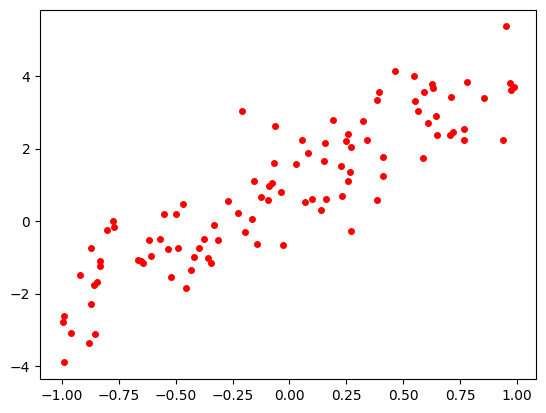

In [6]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

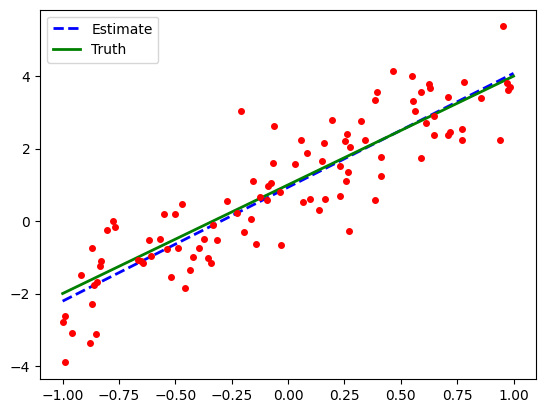

In [12]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate is very close but slightly off the difference is almost negligible though.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

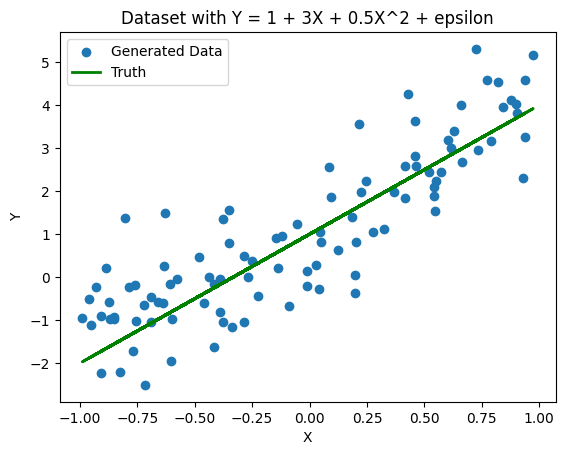

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
SAMPLE_SIZE = 100

# True coefficients
true_coeffs = np.array([1, 3, 0.5])

# Generate random X values
X = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Generate Y values with the quadratic term and some random noise
eps = np.random.randn(SAMPLE_SIZE)
Y = true_coeffs[0] + true_coeffs[1] * X + true_coeffs[2] * X**2 + eps

# Plot the generated dataset
plt.scatter(X, Y, label='Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, true_coeffs[0] + true_coeffs[1] * X, lw=2, c='g', label='Truth')
plt.title('Dataset with Y = 1 + 3X + 0.5X^2 + epsilon')
plt.legend()
plt.show()

e) Plot the least squares estimate line through the scatter plot.

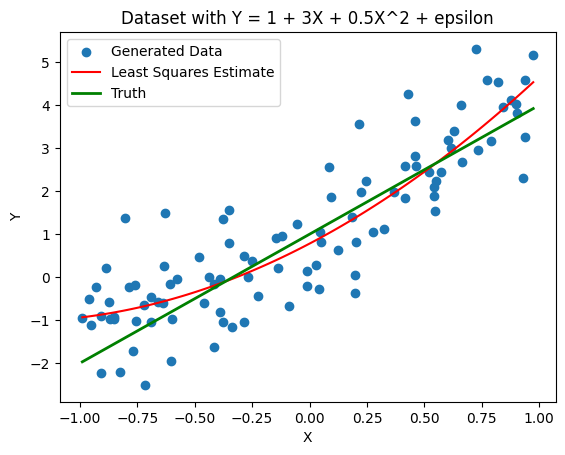

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
SAMPLE_SIZE = 100

# True coefficients
true_coeffs = np.array([1, 3, 0.5])

# Generate random X values
X = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Generate Y values with the quadratic term and some random noise
eps = np.random.randn(SAMPLE_SIZE)
Y = true_coeffs[0] + true_coeffs[1] * X + true_coeffs[2] * X**2 + eps

# Perform linear regression to estimate coefficients
X_design = np.column_stack((np.ones_like(X), X, X**2))
beta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y

# Generate points for plotting the estimated regression line
X_plot = np.linspace(np.min(X), np.max(X), 100)
X_plot_design = np.column_stack((np.ones_like(X_plot), X_plot, X_plot**2))
Y_est = X_plot_design @ beta_hat

# Plot the generated dataset and the least squares estimate line
plt.scatter(X, Y, label='Generated Data')
plt.plot(X_plot, Y_est, 'r-', label='Least Squares Estimate')
plt.plot(X_plot, true_coeffs[0] + true_coeffs[1] * X_plot, lw=2, c='g', label='Truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Y = 1 + 3X + 0.5X^2 + epsilon')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

There is more of a deviation at extreme values but otherwise it is extremely close.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

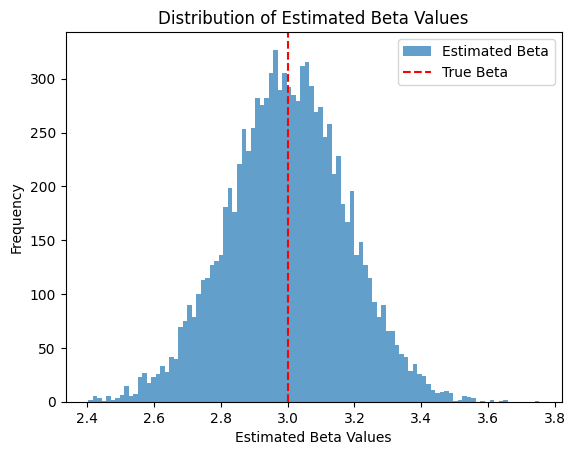

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
SAMPLE_SIZE = 100

# True coefficients
true_beta = np.array([1, 3])

# Number of iterations
num_iterations = 10000

# Container for storing estimated beta values
betas = []

# Repeat the process for a large number of times
for _ in range(num_iterations):
    # Generate random X values
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    
    # Generate Y values using the true coefficients and some random noise
    y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
    
    # Create the design matrix X
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    
    # Calculate the least squares estimate for beta
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Append the estimated beta values to the container
    betas.append(beta_hat)

# Convert the list of beta estimates to a numpy array
betas_array = np.array(betas)

# Plot a histogram of the estimated beta values
plt.hist(betas_array[:, 1], bins=100, alpha=0.7, label='Estimated Beta')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Beta')
plt.xlabel('Estimated Beta Values')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Beta Values')
plt.legend()
plt.show()
